In [1]:
import torch

# Tensors definition

In [2]:
#NUmber
t1 = torch.tensor(4.)
t1

tensor(4.)

In [3]:
t1.dtype

torch.float32

In [4]:
#Vector
t2 = torch.tensor([2,4.,5,6])
t2

tensor([2., 4., 5., 6.])

In [5]:
#matrix
t3 = torch.tensor([[5,6],[7,8],[8,9]])
t3

tensor([[5, 6],
        [7, 8],
        [8, 9]])

In [6]:
# 3-dimensional array
t4 = torch.tensor([
    [[11,12,13],
    [13,14,15]],
    [
        [15,16,17],
        [17,18,19]
    ]
])
t4

tensor([[[11, 12, 13],
         [13, 14, 15]],

        [[15, 16, 17],
         [17, 18, 19]]])

In [7]:
t1.shape

torch.Size([])

In [8]:
t2.shape

torch.Size([4])

In [9]:
t3.shape

torch.Size([3, 2])

In [10]:
t4.shape

torch.Size([2, 2, 3])

# Tensors Operations and Gradients

In [11]:
#Create  tensors
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [12]:
#Arithmetic Operations
y = w*x+b
y

tensor(17., grad_fn=<AddBackward0>)

In [13]:
#Compute derivatives
y.backward()

In [14]:
#Display Gradients
print('dy/dx:',x.grad)
print('dy/dw:',w.grad)
print('dy/db:',b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


# Interoperability with Numpy

In [15]:
import numpy as np

x = np.array([[1,2],[3,4.]])
x

array([[1., 2.],
       [3., 4.]])

In [16]:
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [17]:
x. dtype, y.dtype

(dtype('float64'), torch.float64)

In [18]:
#Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

# Linear Regression

In [19]:
import numpy as np
import torch

In [20]:
#IMput (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [21]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [22]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


# Model from scratch

In [23]:
# Weigths and biases
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[ 0.6914, -2.3950, -0.9955],
        [-0.2904,  1.5077,  0.7031]], requires_grad=True)
tensor([-0.5334,  0.2467], requires_grad=True)


In [24]:
def model(x):
    return x @ w.t() + b

In [25]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-153.3353,  110.2957],
        [-212.0919,  151.4950],
        [-319.0551,  217.7944],
        [ -69.8306,   61.4688],
        [-252.4364,  174.1650]], grad_fn=<AddBackward0>)


In [26]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


# Loss function

In [27]:
## MSE Loss
def mse(preds,targets):
    diff = preds-targets
    return torch.sum(diff*diff) / diff.numel()

In [28]:
# Compute loss
loss = mse(preds,targets)
print(loss)

tensor(47138.9844, grad_fn=<DivBackward0>)


## Compute gradients

In [29]:
# Compute gradients
loss.backward()

In [30]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.6914, -2.3950, -0.9955],
        [-0.2904,  1.5077,  0.7031]], requires_grad=True)
tensor([[-22791.0977, -27317.5117, -16288.9551],
        [  4243.1909,   4970.7661,   2929.8745]])


In [31]:
print(b)
print(b.grad)

tensor([-0.5334,  0.2467], requires_grad=True)
tensor([-277.5499,   51.0438])


In [32]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# Adjust weights and biases using gradient descent

In [33]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-153.3353,  110.2957],
        [-212.0919,  151.4950],
        [-319.0551,  217.7944],
        [ -69.8306,   61.4688],
        [-252.4364,  174.1650]], grad_fn=<AddBackward0>)


In [34]:
#Calculate the loss
loss = mse(preds,targets)
print(loss)

tensor(47138.9844, grad_fn=<DivBackward0>)


In [35]:
#Cumpute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-22791.0977, -27317.5117, -16288.9551],
        [  4243.1909,   4970.7661,   2929.8745]])
tensor([-277.5499,   51.0438])


In [36]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad*1e-5
    b -= b.grad*1e-5
    w.grad.zero_()
    b.grad.zero_()

In [37]:
print(w)
print(b)

tensor([[ 0.9193, -2.1218, -0.8327],
        [-0.3329,  1.4580,  0.6738]], requires_grad=True)
tensor([-0.5307,  0.2462], requires_grad=True)


In [38]:
#Calculate the loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor(32728.7598, grad_fn=<DivBackward0>)


In [39]:
# Train for 100 mepochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds,targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad*1e-5
        b -= b.grad*1e-5
        w.grad.zero_()
        b.grad.zero_()

In [40]:
#Calculate the loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor(865.3555, grad_fn=<DivBackward0>)


In [41]:
preds

tensor([[ 70.2479,  68.8553],
        [ 88.3262,  96.4696],
        [ 83.7416, 144.8499],
        [ 97.3568,  28.0036],
        [ 67.9511, 117.1373]], grad_fn=<AddBackward0>)

In [42]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Linear regression using Pytorch built-ins

In [43]:
import torch.nn as nn

In [44]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

In [45]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

## Dataset and DataLoader

In [46]:
from torch.utils.data import TensorDataset

In [47]:
#Define dataset
train_ds = TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [48]:
from torch.utils.data import DataLoader

In [49]:
#Define data loader
batch_size = 5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [50]:
for xb,yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 73.,  67.,  43.],
        [ 68.,  97.,  70.],
        [ 73.,  66.,  44.],
        [101.,  44.,  37.],
        [ 92.,  87.,  64.]])
tensor([[ 56.,  70.],
        [102., 120.],
        [ 57.,  69.],
        [ 21.,  38.],
        [ 82., 100.]])


In [51]:
# Define model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4970, -0.5742, -0.3320],
        [ 0.5738, -0.2479, -0.5610]], requires_grad=True)
Parameter containing:
tensor([ 0.1805, -0.1184], requires_grad=True)


In [52]:
#Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.4970, -0.5742, -0.3320],
         [ 0.5738, -0.2479, -0.5610]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1805, -0.1184], requires_grad=True)]

In [53]:
#Generate predictions
preds = model(inputs)
preds

tensor([[ -88.8503,    1.0335],
        [-116.8272,   -5.6262],
        [-139.2612,  -15.9594],
        [ -87.4906,   26.9898],
        [-112.4786,  -23.5993],
        [ -88.7731,    1.8553],
        [-116.5850,   -5.9393],
        [-140.0902,  -15.9466],
        [ -87.5678,   26.1681],
        [-112.3135,  -24.7341],
        [ -88.6081,    0.7204],
        [-116.7500,   -4.8045],
        [-139.5034,  -15.6462],
        [ -87.6557,   28.1247],
        [-112.5557,  -24.4210]], grad_fn=<AddmmBackward0>)

## Loss function

In [54]:
#Import nn.functional
import torch.nn.functional as F

In [55]:
#Define loss function
loss_fn = F.mse_loss

In [56]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(24375.3223, grad_fn=<MseLossBackward0>)


## Optimizer

In [57]:
#Define the optimizer
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

## Train the model



1. Generate predictions

2. Calculate the loss

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero


In [58]:
#Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, traind_dl):
    
    #Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        #Train with batches of data
        for xb, yb in train_dl:
            
            #Step 1
            pred = model(xb)
            
            #Step 2
            loss = loss_fn(pred,yb)
            
            #Step 3
            loss.backward()
            
            #Step 4
            opt.step()
            
            #Step 5
            opt.zero_grad()
            
            #Print progress
            if (epoch+1) % 10 == 0:
                print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [59]:
fit(100,model,loss_fn,opt,train_dl)

Epoch [10/100], Loss: 257.0315
Epoch [10/100], Loss: 226.2509
Epoch [10/100], Loss: 1842.2223
Epoch [20/100], Loss: 441.7071
Epoch [20/100], Loss: 274.1724
Epoch [20/100], Loss: 876.3385
Epoch [30/100], Loss: 602.6742
Epoch [30/100], Loss: 140.9723
Epoch [30/100], Loss: 375.8791
Epoch [40/100], Loss: 344.0898
Epoch [40/100], Loss: 430.6446
Epoch [40/100], Loss: 27.3027
Epoch [50/100], Loss: 198.9988
Epoch [50/100], Loss: 195.3437
Epoch [50/100], Loss: 189.6536
Epoch [60/100], Loss: 144.2538
Epoch [60/100], Loss: 148.1112
Epoch [60/100], Loss: 146.8737
Epoch [70/100], Loss: 171.8497
Epoch [70/100], Loss: 107.5531
Epoch [70/100], Loss: 64.3929
Epoch [80/100], Loss: 53.3205
Epoch [80/100], Loss: 128.9695
Epoch [80/100], Loss: 85.2114
Epoch [90/100], Loss: 100.0471
Epoch [90/100], Loss: 13.2762
Epoch [90/100], Loss: 105.5511
Epoch [100/100], Loss: 61.9103
Epoch [100/100], Loss: 59.3533
Epoch [100/100], Loss: 59.8153


In [60]:
preds = model(inputs)
preds

tensor([[ 58.2553,  72.6562],
        [ 80.7752,  96.1217],
        [118.8062, 139.2556],
        [ 28.1216,  50.3719],
        [ 95.4590, 103.4271],
        [ 57.1544,  71.7473],
        [ 80.3330,  95.2829],
        [118.9838, 139.4225],
        [ 29.2225,  51.2808],
        [ 96.1177, 103.4972],
        [ 57.8131,  71.8174],
        [ 79.6743,  95.2128],
        [119.2484, 140.0944],
        [ 27.4629,  50.3017],
        [ 96.5600, 104.3360]], grad_fn=<AddmmBackward0>)

In [61]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

# Logistic Regresion

In [62]:
#Imports
import torchvision
from torchvision.datasets import MNIST

In [63]:
#Download trainig dataset
dataset =MNIST(root='./data', download=True)

In [64]:
len(dataset)

60000

In [65]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [66]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FE2BA1AC400>, 5)

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


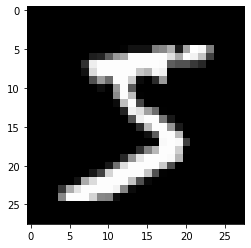

In [68]:
image, label =dataset[0]
plt.imshow(image,cmap='gray')
print('Label: ',label)

Label:  3


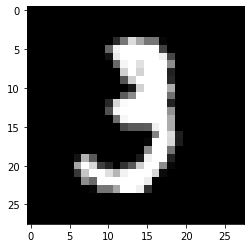

In [69]:
image, label =dataset[10]
plt.imshow(image,cmap='gray')
print('Label: ',label)

In [70]:
import torchvision.transforms as transforms

In [71]:
#MNIST dataset (images and labels)
dataset = MNIST(root='data/',
               train=True,
               transform=transforms.ToTensor())

In [72]:
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [73]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


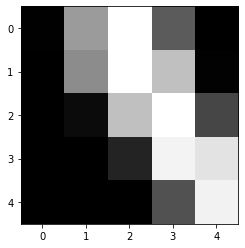

In [74]:
#Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

## Trainig and Validation Datasets

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.


In [75]:
# FUnction that randomly picks a given fraction of the images for the validation set
def split_indices(n, val_pct):
    #Determine size of validation set
    n_val = int(val_pct*n)
    #Create random permutation of 0 to n-1
    idxs = np.random. permutation(n)
    #Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [76]:
n = 60000
val_pct = 0.5

In [77]:
train_indices, val_indices = split_indices(len(dataset),val_pct=0.2)

In [78]:
print(len(train_indices),len(val_indices))
print('Sample val indices ', val_indices[:20])

48000 12000
Sample val indices  [46135 19698 46558 51112 19307 19496 34429 14519 24827 58282   863 46767
  9804 47027  5654 27595 51590 38483 38567 32112]


In [79]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [80]:
batch_size = 100

#Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler
)

#Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                       batch_size,
                       sampler=val_sampler)

## Model

In [81]:
input_size = 28*28
num_classes = 10

#Logistic regression model
model = nn.Linear(input_size,num_classes)

In [82]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0078,  0.0202, -0.0211,  ..., -0.0007,  0.0056,  0.0069],
        [-0.0088,  0.0082, -0.0152,  ...,  0.0175, -0.0281, -0.0106],
        [ 0.0009,  0.0346,  0.0336,  ...,  0.0198, -0.0269,  0.0027],
        ...,
        [-0.0172, -0.0042, -0.0271,  ...,  0.0057,  0.0181, -0.0122],
        [ 0.0247, -0.0176,  0.0102,  ..., -0.0150, -0.0248, -0.0114],
        [-0.0169, -0.0126,  0.0134,  ..., -0.0170,  0.0281,  0.0355]],
       requires_grad=True)

In [83]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0164, -0.0073,  0.0196, -0.0151,  0.0331,  0.0156,  0.0027, -0.0059,
        -0.0270, -0.0341], requires_grad=True)

In [84]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [85]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0113,  0.0356,  0.0347,  ...,  0.0034, -0.0104, -0.0347],
         [-0.0149,  0.0137,  0.0327,  ...,  0.0019, -0.0322,  0.0107],
         [-0.0044,  0.0110, -0.0272,  ...,  0.0004,  0.0248, -0.0326],
         ...,
         [-0.0077,  0.0175, -0.0344,  ...,  0.0152, -0.0158, -0.0196],
         [-0.0310, -0.0343,  0.0136,  ...,  0.0139, -0.0335, -0.0337],
         [ 0.0308, -0.0249, -0.0099,  ..., -0.0122,  0.0183,  0.0157]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0108, -0.0165, -0.0001, -0.0249, -0.0115,  0.0007,  0.0163,  0.0070,
          0.0076,  0.0156], requires_grad=True)]

In [86]:
for images, labels in train_loader:
    outputs = model(images)
    break
print('Outputs.shape: ',outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Outputs.shape:  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.0813,  0.0437, -0.1302, -0.1006,  0.0487, -0.3301, -0.5271, -0.1435,
         -0.1237,  0.2461],
        [-0.1234,  0.1262, -0.0606,  0.0581,  0.1388,  0.0967, -0.2095, -0.0312,
          0.0772, -0.0250]])


In [87]:
import torch.nn.functional as F

In [89]:
#Apply softmax for each output row
probs = F.softmax(outputs,dim=1)

#Look at sample probabilities
print("Sample probabilities:\n",probs[:2].data)

#Add up the probabilities of an output row
print("Sum: ",torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1009, 0.1143, 0.0961, 0.0990, 0.1149, 0.0787, 0.0646, 0.0948, 0.0967,
         0.1400],
        [0.0875, 0.1123, 0.0931, 0.1049, 0.1137, 0.1090, 0.0802, 0.0959, 0.1069,
         0.0965]])
Sum:  1.0


In [90]:
max_probs, preds = torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([9, 4, 1, 5, 8, 8, 8, 9, 4, 9, 8, 1, 9, 8, 1, 9, 1, 8, 1, 8, 0, 4, 4, 1,
        1, 1, 1, 1, 1, 8, 8, 1, 8, 9, 5, 5, 9, 1, 7, 8, 5, 1, 2, 4, 8, 1, 8, 8,
        0, 8, 1, 9, 8, 1, 8, 9, 1, 5, 1, 9, 8, 1, 1, 1, 1, 9, 1, 8, 5, 1, 1, 1,
        1, 1, 5, 8, 5, 1, 4, 8, 9, 1, 1, 8, 5, 1, 1, 9, 8, 9, 5, 9, 9, 1, 8, 1,
        9, 1, 2, 8])
tensor([0.1400, 0.1137, 0.1421, 0.1352, 0.1336, 0.1222, 0.1245, 0.1324, 0.1513,
        0.1332, 0.1295, 0.1282, 0.1403, 0.1393, 0.1310, 0.1338, 0.1839, 0.1223,
        0.1208, 0.1465, 0.1202, 0.1366, 0.1407, 0.1473, 0.1211, 0.1180, 0.1255,
        0.1420, 0.1317, 0.1227, 0.1284, 0.1818, 0.1604, 0.1362, 0.1263, 0.1228,
        0.1223, 0.1189, 0.1290, 0.1437, 0.1333, 0.1187, 0.1150, 0.1363, 0.1336,
        0.1375, 0.1301, 0.1355, 0.1305, 0.1292, 0.1318, 0.1289, 0.1540, 0.1435,
        0.1399, 0.1187, 0.1394, 0.1206, 0.1342, 0.1288, 0.1293, 0.1526, 0.1286,
        0.1335, 0.1346, 0.1248, 0.1226, 0.1546, 0.1229, 0.1560, 0.1574, 0.1481,
        0.1406, 0.1

In [91]:
labels

tensor([9, 1, 7, 1, 5, 1, 6, 0, 4, 2, 9, 3, 9, 0, 6, 9, 7, 4, 1, 0, 0, 2, 4, 3,
        9, 1, 6, 8, 3, 4, 6, 4, 8, 4, 1, 1, 2, 1, 2, 8, 2, 8, 8, 5, 2, 2, 6, 9,
        0, 9, 1, 5, 7, 2, 7, 9, 3, 1, 1, 4, 2, 7, 4, 7, 6, 7, 1, 7, 1, 6, 0, 9,
        2, 3, 1, 7, 2, 7, 4, 0, 0, 6, 6, 7, 1, 9, 2, 9, 7, 4, 8, 4, 5, 0, 0, 1,
        9, 2, 8, 3])

## Evaluation Metric and Loss Function

In [96]:
 def accuracy(pred,true):
        return torch.sum(pred==true).item()/len(pred)

In [97]:
accuracy(preds,labels)

0.2

In [98]:
loss_fn = F.cross_entropy

In [99]:
#Loss for current batch of data
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.2490, grad_fn=<NllLossBackward0>)


## Optimizer

In [100]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

## Training the model

In [101]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    #Calculate loss
    preds = model(xb)
    loss = loss_func(preds,yb)
    
    if opt is not None:
        #Compute gradients
        loss.backward()
        #Update parameters
        opt.step()
        #Reset gradients
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        #Compute the metric
        metric_result = metric(preds,yb)
    
    return loss.item(), len(xb), metric_result

In [102]:
def evaluate(model, loss_fn, valid_d1, metric=None):
    with torch.no_grad():
        #Pass each batch throuh the model
        results = [loss_batch(model,loss_fn,xb,yb,metric=metric) 
                   for xb,yb in valid_d1]
        #Separate losses, count and metrics
        losses, nums, metrics = zip(*results)
        #Total size of the dataset
        total = np.sum(nums)
        #Avg. loss across batches
        avg_loss = np.sum(np.multiply(losses,nums)) / total
        avg_metric = None
        if metric is not None:
            #Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics,nums)) / total
        return avg_loss, total, avg_metric

In [103]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item() / len(preds)

In [105]:
val_loss, total, val_acc = evaluate(model,loss_fn,val_loader,metric=accuracy)
print('Loss: {:.4f}, Accuracy:.{:.4f}'.format(val_loss,val_acc))

Loss: 2.2760, Accuracy:.0.1863


In [111]:
def fit(epochs,model,loss_fn, opt,train_dl,valid_dl,metric=None):
    for epoch in range(epochs):
        #Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
        #Evaluation
        result = evaluate(model,loss_fn,valid_dl,metric)
        val_loss, total, val_metric = result
        
        #Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                 .format(epoch+1,epochs,val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                 .format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [112]:
#Redifine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [113]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5], Loss: 1.8889, accuracy: 0.6664
Epoch [2/5], Loss: 1.5872, accuracy: 0.7498
Epoch [3/5], Loss: 1.3756, accuracy: 0.7814
Epoch [4/5], Loss: 1.2240, accuracy: 0.7984
Epoch [5/5], Loss: 1.1118, accuracy: 0.8103


# Saving and loading the model

In [114]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [115]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0265, -0.0053, -0.0292,  ...,  0.0125,  0.0084,  0.0084],
                      [-0.0333,  0.0024, -0.0311,  ...,  0.0037,  0.0226,  0.0224],
                      [-0.0230, -0.0313,  0.0059,  ...,  0.0340,  0.0221,  0.0242],
                      ...,
                      [-0.0294, -0.0064, -0.0147,  ..., -0.0290, -0.0250, -0.0018],
                      [-0.0327,  0.0297,  0.0070,  ...,  0.0289, -0.0144,  0.0097],
                      [ 0.0186, -0.0245, -0.0177,  ...,  0.0082, -0.0309, -0.0192]])),
             ('linear.bias',
              tensor([-0.0251,  0.0742, -0.0422,  0.0073, -0.0148,  0.0026, -0.0060, -0.0135,
                      -0.0370, -0.0078]))])

In [116]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0265, -0.0053, -0.0292,  ...,  0.0125,  0.0084,  0.0084],
                      [-0.0333,  0.0024, -0.0311,  ...,  0.0037,  0.0226,  0.0224],
                      [-0.0230, -0.0313,  0.0059,  ...,  0.0340,  0.0221,  0.0242],
                      ...,
                      [-0.0294, -0.0064, -0.0147,  ..., -0.0290, -0.0250, -0.0018],
                      [-0.0327,  0.0297,  0.0070,  ...,  0.0289, -0.0144,  0.0097],
                      [ 0.0186, -0.0245, -0.0177,  ...,  0.0082, -0.0309, -0.0192]])),
             ('linear.bias',
              tensor([-0.0251,  0.0742, -0.0422,  0.0073, -0.0148,  0.0026, -0.0060, -0.0135,
                      -0.0370, -0.0078]))])

In [118]:
test_loss, total, test_acc = evaluate(model2,loss_fn,val_loader,metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss,test_acc))

Loss: 1.1118, Accuracy: 0.8103
